In [1]:
import sys
sys.path.append('../')
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from smodels.theory.element import Element
from smodels.particlesLoader import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.theory.model import Model
from smodels.tools.physicsUnits import GeV

### Create element from old string format

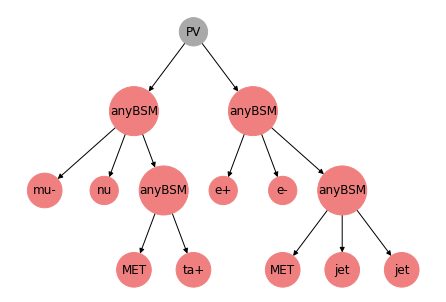

Name= 1110101101000110101101010000 
Process= (PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > mu-,nu,anyBSM(3)), (anyBSM(2) > e+,e-,anyBSM(4)), (anyBSM(3) > MET,ta+), (anyBSM(4) > MET,jet,jet)
[(PV, 0), (anyBSM, 1), (anyBSM, 2), (mu-, 3), (nu, 4), (anyBSM, 5), (e+, 6), (e-, 7), (anyBSM, 8), (MET, 9), (ta+, 10), (MET, 11), (jet, 12), (jet, 13)]
[(PV, anyBSM), (PV, anyBSM), (anyBSM, mu-), (anyBSM, nu), (anyBSM, anyBSM), (anyBSM, e+), (anyBSM, e-), (anyBSM, anyBSM), (anyBSM, MET), (anyBSM, ta+), (anyBSM, MET), (anyBSM, jet), (anyBSM, jet)]


In [2]:
elementStr = "[[['e+','e-'],['jet','jet']],[['mu-','nu'],['ta+']]]"
el = Element(info=elementStr)
el.drawTree()
print('Name=',el.canonName,'\nProcess=',el)
print([(n,n.node) for n in el.tree.nodes])
print(el.tree.edges)

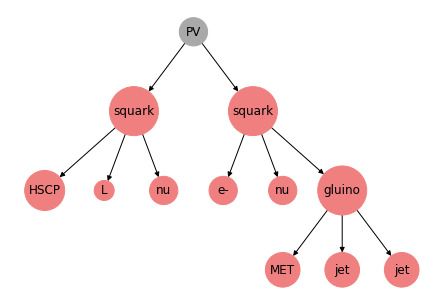

Name= 111010100110101101010000 
Process= (PV > squark(1),squark(2)), (squark(1) > HSCP,L,nu), (squark(2) > e-,nu,gluino(3)), (gluino(3) > MET,jet,jet)
[(PV, 0), (squark, 1), (squark, 2), (HSCP, 3), (L, 4), (nu, 5), (e-, 6), (nu, 7), (gluino, 8), (MET, 9), (jet, 10), (jet, 11)]
[(PV, squark), (PV, squark), (squark, HSCP), (squark, L), (squark, nu), (squark, e-), (squark, nu), (squark, gluino), (gluino, MET), (gluino, jet), (gluino, jet)]


In [3]:
stringEl = "[ [['e-','nu'], ['jet','jet'] ], [ ['L','nu'] ] ]"
finalStates=['MET','HSCP']
intermediateStates=[['squark','gluino'],['squark']]
el = Element(info=stringEl,finalState=finalStates,intermediateState=intermediateStates)
el.drawTree()
print('Name=',el.canonName,'\nProcess=',el)
print([(n,n.node) for n in el.tree.nodes])
print(el.tree.edges)

### Create element from new string format

In [4]:
elementStr = str(el)
print(elementStr)

(PV > squark(1),squark(2)), (squark(1) > HSCP,L,nu), (squark(2) > e-,nu,gluino(3)), (gluino(3) > MET,jet,jet)


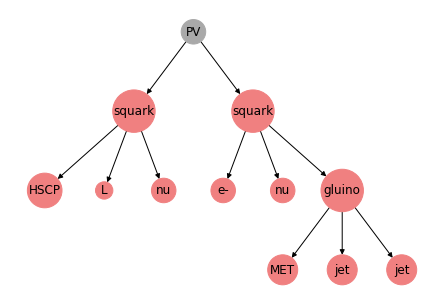

AttributeError: Neither element nor particles have attribute ``getCanonName''

In [5]:
el = Element(info=elementStr)
el.drawTree(nodeScale=3)
print('Name=',el.canonName,'\nProcess=',el)
print([(n,n.node) for n in el.tree.nodes])
print(el.tree.edges)

In [ ]:
elementStr = proc = "(PV > Z'(1)), (Z'(1) > e+, e-)"
el = Element(info=elementStr)
el.drawTree(nodeScale=10)
print('Name=',el.canonName,'\nProcess=',el)
print([(n,n.node) for n in el.tree.nodes])
print(el.tree.edges)

In [ ]:
elementStr = proc = "(PV > Z'(1)), (Z'(1) > X(2), h), (X(2) > j,j)"
el = Element(info=elementStr)
el.drawTree(nodeScale=10)
print('Name=',el.canonName,'\nProcess=',el)
print([(n,n.node) for n in el.tree.nodes])
print(el.tree.edges)

In [ ]:
elementStr = proc = "(PV > q,LQ(1)), (LQ(1) > e+, j)"
el = Element(info=elementStr)
el.drawTree(nodeScale=10)
print('Name=',el.canonName,'\nProcess=',el)
print([(n,n.node) for n in el.tree.nodes])
print(el.tree.edges)

In [ ]:
elementStr = proc = '(PV > gluino(1),squark(2)), (gluino(1) > X(3),X(4),jet), (squark(2) > HSCP,L,nu), (X(3) > nu,nu), (X(4) > MET,e-)'
el = Element(info=elementStr)
el.drawTree(nodeScale=3)
print('Name=',el.canonName)
print([(n,n.node) for n in el.tree.nodes])
print(el.tree.edges)

In [ ]:
print(el)

### Create element using a model

In [ ]:
slhafile = '../inputFiles/slha/lightEWinos.slha'
model = Model(BSMparticles=BSMList, SMparticles=SMList)
model.updateParticles(inputFile=slhafile)


In [ ]:
stringEl = "(PV > su_L(1),su_L~(2)), (su_L(1) > gluino(3),e-,nu), (su_L~(2) > C1+,d), (gluino(3) > N1,u,u~)"
el = Element(info=stringEl,model=model)
el.drawTree(nodeScale=3)
print(el.tree.nodes)
print([(n,n.node) for n in el.tree.nodes])
print(el.tree.edges)

#### Draw tree using distinct property for labels

In [ ]:
el.drawTree(nodeScale=4,labelAttr='isSM')

In [ ]:
el.drawTree(nodeScale=4,labelAttr='mass',attrUnit=GeV)

In [ ]:
el.drawTree(nodeScale=5,labelAttr='node')

#### Convert to old bracket notation

In [ ]:
elB,finalState,intermediateState = el.tree.treeToBrackets()
print(elB)
print(finalState)
print(intermediateState)

In [ ]:
stringEl = "(PV > N1,C1+(1)), (C1+(1) > N1,u,d)"
el = Element(info=stringEl,model=model)
el.drawTree(nodeScale=3)
print([(n,n.node) for n in el.tree.nodes])
print(el.tree.edges)

In [ ]:
elB,finalState,intermediateState = el.tree.treeToBrackets()
print(elB)
print(finalState)
print(intermediateState)

### Get attributes from nodes

In [ ]:
el.drawTree()
print([(n,n.node) for n in el.tree.nodes])
print(el.tree.edges)

In [ ]:
masses = list(zip(el.tree.nodes,el.mass))
print(masses)

In [ ]:
pdgs = list(zip(el.tree.nodes,el.pdg))
print(pdgs)

In [ ]:
Z2parity = list(zip(el.tree.nodes,el.isSM))
print(Z2parity)

In [ ]:
# Final states:
print(el.getFinalStates())